<a href="https://colab.research.google.com/github/Cassiosa/Imobiliaria/blob/main/Bezerra_imobiliaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo Excel para entender sua estrutura e conteúdo
file_path = '/content/Imobiliaria_Bezerra_3b7a980657.xlsx'
excel_data = pd.ExcelFile(file_path)

# Exibir os nomes das planilhas para explorar os dados
excel_data.sheet_names


['Fortaleza_vendas']

In [7]:
# Carregar os dados da planilha "Fortaleza_vendas"
fortaleza_vendas = pd.read_excel(file_path, sheet_name='Fortaleza_vendas')

# Exibir as primeiras linhas do DataFrame para entender a estrutura dos dados
fortaleza_vendas.head()


,Cidade,Bairro,Preço,Vendedor,Data da Venda,Metros Quadrados,Ano de Construção,Tipo de Imóvel,Valor de Compra,Comissão do Vendedor
0,Fortaleza,Aldeota,860058,André Cardoso,08/01/2024,427,1994,Apartamento,611357.01,60204.06
1,Fortaleza,Aldeota,1080037,Vanessa Andrade,NaN,66,1980,Apartamento,853902.34,75602.59
2,Fortaleza,Aldeota,853440,Clara Matos,NaN,297,1963,Sobrado,736587.61,51206.40
3,Fortaleza,Aldeota,883433,Alessandra Moraes,NaN,403,2000,Apartamento,768867.13,61840.31
4,Fortaleza,Aldeota,1175370,Marina Teixeira,27/03/2024,268,1992,Casa,1015747.18,94029.60


In [8]:
# Ajustando configurações do pandas para exibir todos os dados relevantes
pd.set_option('display.max_columns', None)

# Tratamento inicial dos dados
# Verificando valores ausentes
missing_values = fortaleza_vendas.isnull().sum()

# Preenchimento e tratando valores ausentes
fortaleza_vendas['Data da Venda'] = pd.to_datetime(fortaleza_vendas['Data da Venda'], errors='coerce')
fortaleza_vendas['Data da Venda'].fillna(method='bfill', inplace=True)  # Preenchendo valores ausentes com a próxima data válida
fortaleza_vendas['Data da Venda'].fillna(method='ffill', inplace=True)  # Preenchendo valores restantes

# Adicionando colunas úteis
fortaleza_vendas['Ano de Venda'] = fortaleza_vendas['Data da Venda'].dt.year
fortaleza_vendas['Mês de Venda'] = fortaleza_vendas['Data da Venda'].dt.month

# Verificando e ajustando os tipos de dados
fortaleza_vendas['Preço'] = pd.to_numeric(fortaleza_vendas['Preço'], errors='coerce')
fortaleza_vendas['Valor de Compra'] = pd.to_numeric(fortaleza_vendas['Valor de Compra'], errors='coerce')

# Removendo linhas com valores inválidos ou ausentes em colunas críticas
fortaleza_vendas.dropna(subset=['Preço', 'Valor de Compra', 'Vendedor', 'Data da Venda'], inplace=True)

# Explorando inicio após o tratamento
summary_stats = fortaleza_vendas.describe()

# Visualizando os dados tratados
fortaleza_vendas.head(), summary_stats, missing_values


<ipython-input-8-45bef2e6a93e>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fortaleza_vendas['Data da Venda'].fillna(method='bfill', inplace=True)  # Preenchendo valores ausentes com a próxima data válida
<ipython-input-8-45bef2e6a93e>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fortaleza_vendas['Data da Venda'].fillna(method='bfill', inplace=True)  # Preenchendo valores ausentes com a próxima data válida
<ipython-input-8-45bef2

(      Cidade   Bairro    Preço           Vendedor Data da Venda  \
 0  Fortaleza  Aldeota   860058      André Cardoso    2024-08-01   
 1  Fortaleza  Aldeota  1080037    Vanessa Andrade    2024-01-03   
 2  Fortaleza  Aldeota   853440        Clara Matos    2024-01-03   
 3  Fortaleza  Aldeota   883433  Alessandra Moraes    2024-01-03   
 4  Fortaleza  Aldeota  1175370    Marina Teixeira    2024-01-03   
 
    Metros Quadrados  Ano de Construção Tipo de Imóvel  Valor de Compra  \
 0               427               1994    Apartamento        611357.01   
 1                66               1980    Apartamento        853902.34   
 2               297               1963        Sobrado        736587.61   
 3               403               2000    Apartamento        768867.13   
 4               268               1992           Casa       1015747.18   
 
    Comissão do Vendedor  Ano de Venda  Mês de Venda  
 0              60204.06          2024             8  
 1              75602.59    

**Resumo dos Dados:**

Número de registros válidos: 990 imóveis vendidos.

Colunas adicionais: Foram criadas as colunas "Ano de Venda" e "Mês de Venda" para facilitar a análise temporal.

Valores ausentes: A coluna "Data da Venda" tinha 279 valores ausentes que foram preenchidos usando métodos de interpolação temporal.

Estatísticas Descritivas:

Preço dos imóveis: Média de R$534,341, com valores entre R$52,390 e R$1,288,141.

Metros quadrados: Média de 276m², variando de 50m² a 500m².
Comissão dos vendedores: Média de R$37,542, variando de R$3,143 a R$103,051.

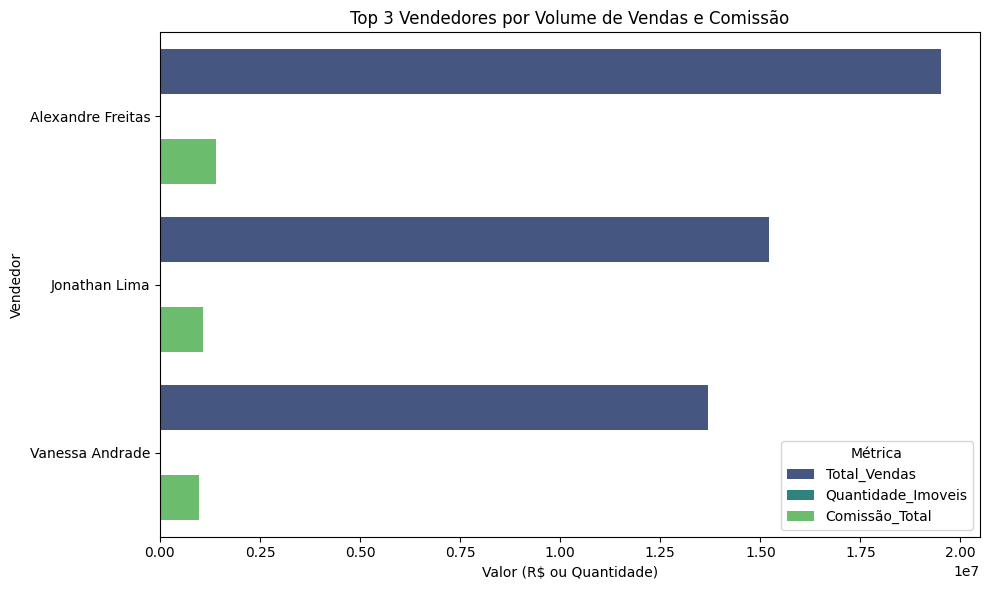

,Vendedor,Total_Vendas,Quantidade_Imoveis,Comissão_Total
0,Alexandre Freitas,19511930,29,1409496.68
1,Jonathan Lima,15225577,25,1064560.76
2,Vanessa Andrade,13695691,26,970833.83


In [17]:
# Análise 1: Identificar os 3 melhores vendedores
top_vendedores = fortaleza_vendas.groupby('Vendedor').agg(
    Total_Vendas=('Preço', 'sum'),
    Quantidade_Imoveis=('Preço', 'count'),
    Comissão_Total=('Comissão do Vendedor', 'sum')
).sort_values(by='Total_Vendas', ascending=False).head(3)

# Visualizar os dados dos melhores vendedores
top_vendedores.reset_index(inplace=True)

# Gráfico para destacar os melhores vendedores
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_vendedores.melt(id_vars='Vendedor', value_vars=['Total_Vendas', 'Quantidade_Imoveis', 'Comissão_Total']),
    x='value', y='Vendedor', hue='variable', palette='viridis'
)
plt.title('Top 3 Vendedores por Volume de Vendas e Comissão')
plt.xlabel('Valor (R$ ou Quantidade)')
plt.ylabel('Vendedor')
plt.legend(title='Métrica', loc='lower right')
plt.tight_layout()
plt.show()

top_vendedores


In [10]:
# Reexecutando a análise exploratória para criar gráficos mais avançados

# 1. Top Vendedores - Análise de desempenho
top_vendedores = fortaleza_vendas.groupby('Vendedor').agg(
    Total_Vendas=('Preço', 'sum'),
    Quantidade_Imoveis=('Preço', 'count'),
    Comissão_Total=('Comissão do Vendedor', 'sum')
).sort_values(by='Total_Vendas', ascending=False).head(3)

# 2. Valorização dos bairros - Média de preços por bairro e cidade
valorizacao_bairros = fortaleza_vendas.groupby(['Cidade', 'Bairro']).agg(
    Preco_Medio=('Preço', 'mean'),
    Quantidade=('Preço', 'count')
).sort_values(by='Preco_Medio', ascending=False)

# 3. Sazonalidade - Total de vendas por mês
sazonalidade_vendas = fortaleza_vendas.groupby('Mês de Venda').agg(
    Total_Vendas=('Preço', 'sum'),
    Quantidade_Imoveis=('Preço', 'count')
).reset_index()

# 4. Reajuste de Preços - Identificar imóveis candidatos ao reajuste
reajuste_imoveis = fortaleza_vendas[
    (fortaleza_vendas['Preço'] < fortaleza_vendas.groupby('Bairro')['Preço'].transform('mean')) &
    (fortaleza_vendas['Ano de Construção'] >= 2000)
]

# Visualizar as primeiras linhas de cada análise
top_vendedores, valorizacao_bairros.head(), sazonalidade_vendas, reajuste_imoveis.head()


(                   Total_Vendas  Quantidade_Imoveis  Comissão_Total
 Vendedor                                                           
 Alexandre Freitas      19511930                  29      1409496.68
 Jonathan Lima          15225577                  25      1064560.76
 Vanessa Andrade        13695691                  26       970833.83,
                         Preco_Medio  Quantidade
 Cidade    Bairro                               
 Natal     Ponta Negra  1.106030e+06          66
 Fortaleza Aldeota      1.041838e+06          66
 Recife    Boa Viagem   8.979854e+05          66
 Natal     Petrópolis   7.917397e+05          66
 Fortaleza Meireles     6.943002e+05          66,
     Mês de Venda  Total_Vendas  Quantidade_Imoveis
 0              1      43602573                  77
 1              2      43741318                  66
 2              3      29581431                  60
 3              4      56110147                 109
 4              5      47926513                  9

                   Total_Vendas  Quantidade_Imoveis  Comissão_Total
Vendedor                                                           
Alexandre Freitas      19511930                  29      1409496.68
Jonathan Lima          15225577                  25      1064560.76
Vanessa Andrade        13695691                  26       970833.83


<ipython-input-12-57f92930c202>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


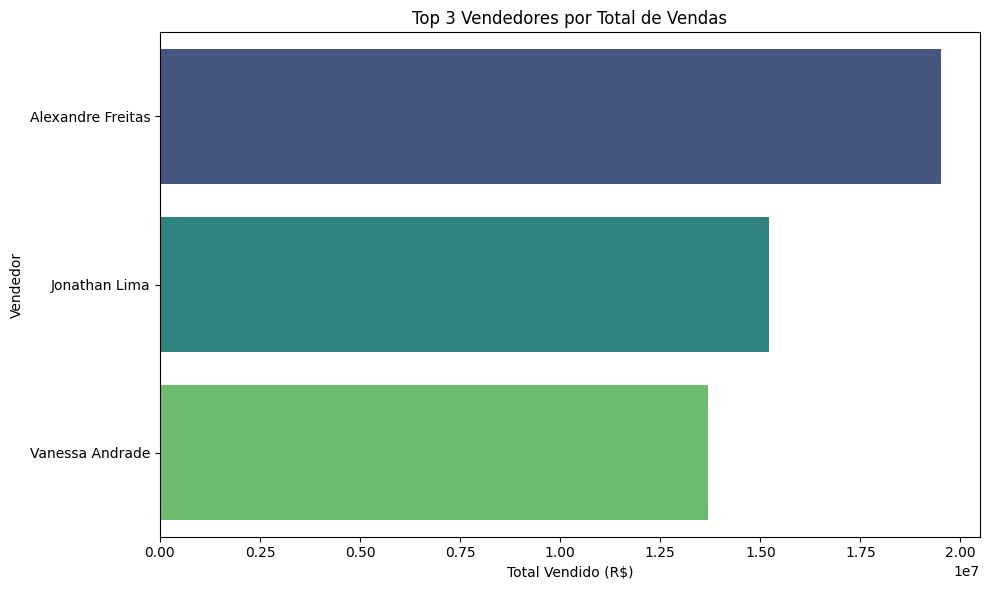

In [12]:
  # Identificar os 3 melhores vendedores por volume total de vendas
  top_vendedores = fortaleza_vendas.groupby('Vendedor').agg(
      Total_Vendas=('Preço', 'sum'),
      Quantidade_Imoveis=('Preço', 'count'),
      Comissão_Total=('Comissão do Vendedor', 'sum')
  ).sort_values(by='Total_Vendas', ascending=False).head(3)

  print(top_vendedores)



  plt.figure(figsize=(10, 6))
  sns.barplot(
      data=top_vendedores.reset_index(),
      x='Total_Vendas', y='Vendedor', palette='viridis'
  )
  plt.title('Top 3 Vendedores por Total de Vendas')
  plt.xlabel('Total Vendido (R$)')
  plt.ylabel('Vendedor')
  plt.tight_layout()
  plt.show()


Análise de Valorização de Bairros

                        Preco_Medio  Quantidade_Imoveis
Cidade    Bairro                                       
Natal     Ponta Negra  1.106030e+06                  66
Fortaleza Aldeota      1.041838e+06                  66
Recife    Boa Viagem   8.979854e+05                  66
Natal     Petrópolis   7.917397e+05                  66
Fortaleza Meireles     6.943002e+05                  66
Recife    Pina         6.054503e+05                  66
Natal     Lagoa Nova   6.032833e+05                  66
Fortaleza Benfica      5.032538e+05                  66
Recife    Casa Forte   4.011219e+05                  66
Natal     Cidade Alta  3.952680e+05                  66
Fortaleza Montese      3.052555e+05                  66
Recife    Tamarineira  2.214876e+05                  66
Natal     Quintas      2.047767e+05                  66
Fortaleza Bom Jardim   1.496462e+05                  66
Recife    Ibura        9.368983e+04                  66


<ipython-input-13-3f54e68e6cb3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


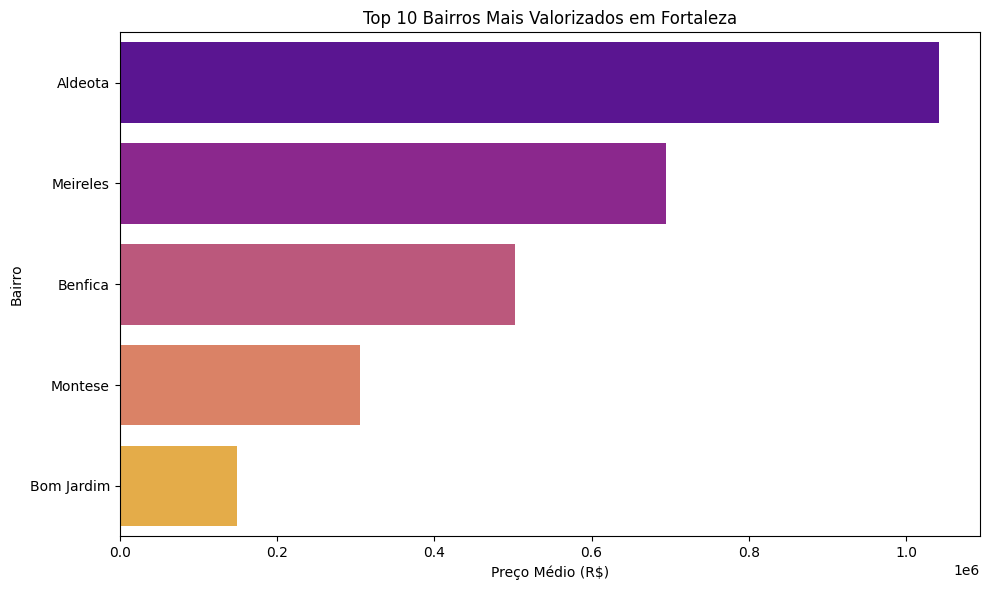

In [13]:
# Identificar bairros mais e menos valorizados por cidade
valorizacao_bairros = fortaleza_vendas.groupby(['Cidade', 'Bairro']).agg(
    Preco_Medio=('Preço', 'mean'),
    Quantidade_Imoveis=('Preço', 'count')
).sort_values(by='Preco_Medio', ascending=False)

print(valorizacao_bairros)

# Gráfico de barras para os 10 bairros mais valorizados em Fortaleza
fortaleza_bairros = valorizacao_bairros.loc['Fortaleza'].head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=fortaleza_bairros,
    x='Preco_Medio', y='Bairro', palette='plasma'
)
plt.title('Top 10 Bairros Mais Valorizados em Fortaleza')
plt.xlabel('Preço Médio (R$)')
plt.ylabel('Bairro')
plt.tight_layout()
plt.show()


Sazonalidade nas Vendas

    Mês de Venda  Total_Vendas  Quantidade_Imoveis
0              1      43602573                  77
1              2      43741318                  66
2              3      29581431                  60
3              4      56110147                 109
4              5      47926513                  96
5              6      44670390                  76
6              7      33141395                  53
7              8      41109739                  97
8              9      36702785                  64
9             10      46949034                  96
10            11      40758885                  85
11            12      64704120                 111


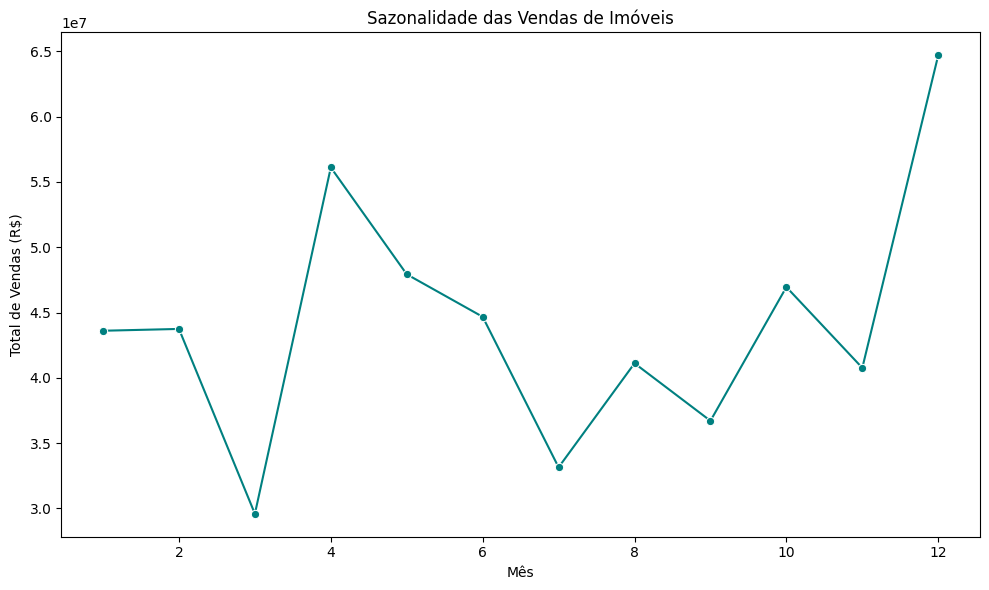

In [14]:
# Total de vendas por mês
sazonalidade_vendas = fortaleza_vendas.groupby('Mês de Venda').agg(
    Total_Vendas=('Preço', 'sum'),
    Quantidade_Imoveis=('Preço', 'count')
).reset_index()

print(sazonalidade_vendas)

# Gráfico de linha para vendas ao longo dos meses
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=sazonalidade_vendas,
    x='Mês de Venda', y='Total_Vendas', marker='o', color='teal'
)
plt.title('Sazonalidade das Vendas de Imóveis')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (R$)')
plt.tight_layout()
plt.show()


Reajuste de Preços

        Cidade   Bairro    Preço           Vendedor Data da Venda  \
3    Fortaleza  Aldeota   883433  Alessandra Moraes    2024-01-03   
6    Fortaleza  Aldeota   854990   Larissa Oliveira    2024-08-11   
14   Fortaleza  Aldeota   926362        Julio Cesar    2024-10-07   
23   Fortaleza  Aldeota  1015410      Adriana Gomes    2024-08-05   
36   Fortaleza  Aldeota   800002      Pedro Almeida    2024-12-10   
..         ...      ...      ...                ...           ...   
971      Natal  Quintas   110632      Pedro Almeida    2024-08-09   
973      Natal  Quintas   190059      Juliana Silva    2024-11-05   
978      Natal  Quintas   101318    Vanessa Andrade    2024-12-06   
982      Natal  Quintas   196359      Natália Ramos    2024-03-07   
986      Natal  Quintas   158956       Paulo Araújo    2024-06-04   

     Metros Quadrados  Ano de Construção Tipo de Imóvel  Valor de Compra  \
3                 403               2000    Apartamento        768867.13   
6                 2

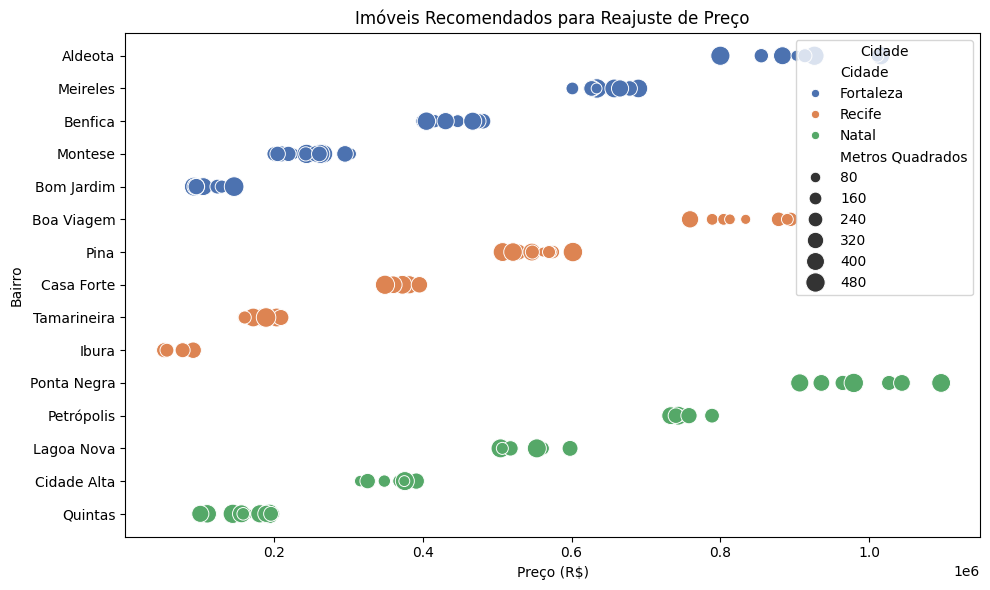

In [16]:
# Identificar imóveis abaixo do valor médio do bairro e construídos recentemente
reajuste_imoveis = fortaleza_vendas[
    (fortaleza_vendas['Preço'] < fortaleza_vendas.groupby('Bairro')['Preço'].transform('mean')) &
    (fortaleza_vendas['Ano de Construção'] >= 2000)
]

print(reajuste_imoveis)

# Gráfico de dispersão para mostrar imóveis recomendados para reajuste
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=reajuste_imoveis,
    x='Preço', y='Bairro', hue='Cidade', palette='deep', size='Metros Quadrados', sizes=(50, 200)
)
plt.title('Imóveis Recomendados para Reajuste de Preço')
plt.xlabel('Preço (R$)')
plt.ylabel('Bairro')
plt.legend(title='Cidade')
plt.tight_layout()
plt.show()
